<a href="https://colab.research.google.com/github/Sushma-tadikamalla/-mini-project.ipynb/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My code

In [1]:
!pip install bing-image-downloader 

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 163 µs (started: 2021-05-24 06:05:11 +00:00)


In [8]:
!mkdir images
#Making a directory with name image 

mkdir: cannot create directory ‘img’: File exists
time: 116 ms (started: 2021-05-24 06:07:56 +00:00)


In [9]:
from bing_image_downloader import downloader 
downloader.download("stars", limit = 30 , output_dir='images ', adult_filter_off= False)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://images.wallpapersden.com/image/download/landscape-night-moon-stars_59994_950x1534.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.wonderfuldiy.com/wp-content/uploads/2017/04/Paper-mache-hot-air-balloon-.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.gratistodo.com/wp-content/uploads/2017/02/Luna-gifs-7.gif
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bing.com/th/id/OGC.fe7d5780cf7c0ea25b255b33bca6f866?pid=1.7&amp;rurl=https%3a%2f%2fwww.gratistodo.com%2fwp-content%2fuploads%2f2017%2f02%2fLuna-gifs-7.gif&amp;ehk=YgCALoeGTAVwdyMYBB6Y%2bpS4ElYMMDsIpEcgVo457fw%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.fe7d5780cf7c0ea25b255b33bca6f866?pid=1.7&amp;rurl=https%3a%2f%2fwww.gratistodo.com%2fwp-content%2fuploads%2f2017%2f02%2fLuna-gifs-7.gif&amp;ehk=YgCALoeGTAVwdyMYBB6Y%2bpS4ElYMMDsIpEcgVo457fw%3d
[!] Error:: HTTP Error 404: Not

In [10]:
from bing_image_downloader import downloader
downloader.download("planets", limit = 30 , output_dir='images ', adult_filter_off= True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://wallpapershome.com/images/wallpapers/space-fire-planet-3840x2160-exoplanet-planet-space-stars-11481.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/planet-1920x1080-galaxy-stars-4k-16848.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.hdwallpapers.in/download/neon_planet_4k-1366x768.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.setaswall.com/wp-content/uploads/2018/04/Planets-Wallpaper-1080x2280-380x802.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/planets_4k-768x1280.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Sun_explosions_outer_space_planets_solar_flares_wallpaper-87210-1024x768.png
[%] File Downloaded !

[%] Downloading Image #7 from https://wallpapershome.com/images/wallpape

In [12]:
# Preprocessing Data
#Step 1 - Resizing
#Step 2 - Flatting data

#importing libraries

import os 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize  #to resize images 

target = []
images = []
flat_data = []

DATADIR = '/content/images '
CATEGORIES = ['stars','planets']

for category in CATEGORIES:   #To iterate in categories
   class_num = CATEGORIES.index(category)  #Labelling categories for easy access
   path = os.path.join(DATADIR,category)   #creating a path to iterate via images
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  #reading images
     img_resized = resize(img_array,(150,150,3)) #resizing images
     flat_data.append(img_resized.flatten())     #flattening images
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 20.5 s (started: 2021-05-24 06:10:57 +00:00)


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 1min 7s (started: 2021-05-24 06:11:17 +00:00)


In [15]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 19.9 ms (started: 2021-05-24 06:12:39 +00:00)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000], 'kernel':['linear']},
              { 'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 36.8 s (started: 2021-05-24 06:12:46 +00:00)


In [17]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

time: 58.6 ms (started: 2021-05-24 06:13:22 +00:00)


In [19]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 3.77 ms (started: 2021-05-24 06:13:28 +00:00)


In [21]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred,y_test)

#Accuracy 


0.9444444444444444

time: 6.68 ms (started: 2021-05-24 06:13:35 +00:00)


In [22]:
confusion_matrix(y_pred,y_test)

array([[11,  1],
       [ 0,  6]])

time: 7.99 ms (started: 2021-05-24 06:13:41 +00:00)


In [24]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 28.6 ms (started: 2021-05-24 06:13:47 +00:00)


In [25]:
model = pickle.load(open('img_model.p','rb'))

time: 24.6 ms (started: 2021-05-24 06:13:52 +00:00)


Enter your URLhttps://images.newscientist.com/wp-content/uploads/2017/06/21180000/planet-10-orange-blue-final-small.jpg?width=600
(400, 600, 3)
Predicted Output:planets


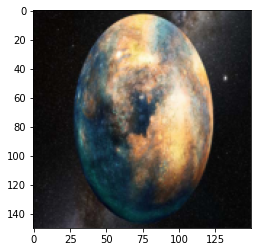

time: 4min 2s (started: 2021-05-24 06:34:59 +00:00)


In [34]:
#Testing with an image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')